## Gaussian Mixture Model

Goal is to build a base model with bayesian GLM.

In [46]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
''
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.mixture import GaussianMixture
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix, f1_score

%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    Based on: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
            

    f1 = f1_score(y_true, y_pred, average='weighted')         
    print(f'Weighted F1 Score: {f1}')
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [13]:
wine_bunch = load_wine()

In [14]:
X = wine_bunch.data
y = wine_bunch.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=0)

In [16]:
value, counts = np.unique(y_train, return_counts=True)
freq = counts/len(y_train)
freq

array([0.31690141, 0.38732394, 0.29577465])

In [17]:
value, counts = np.unique(y_test, return_counts=True)
freq = counts/len(y_test)
freq

array([0.38888889, 0.44444444, 0.16666667])

In [18]:
wine_bunch.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## Build Dummy

In [19]:
clf = DummyClassifier(strategy='stratified', random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Weighted F1 Score: 0.2094017094017094
Confusion matrix, without normalization
[[ 0 14  0]
 [13  2  1]
 [ 0  0  6]]


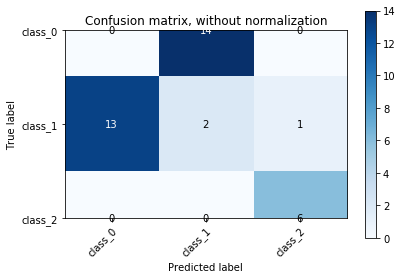

In [37]:
plot_confusion_matrix(y_test, y_pred, classes= wine_bunch.target_names)

## Build LogReg

In [ ]:
pipeline = Pipeline([('n_dist', StandardScaler()),
                     ('clf', LogisticRegression(solver='saga'))
                    ])


## Build GMM

In [38]:
pipeline = Pipeline([('n_dist', StandardScaler()),
                     ('clf', GaussianMixture())
                    ])

parm_space = {'clf__n_components':[2,3,4,5], 
              'clf__covariance_type':['full', 'tied', 'diag', 'spherical']}

In [39]:
models = GridSearchCV(pipeline, parm_space, cv=5)

In [40]:
models.fit(X_train, y_train)

/home/rob/anaconda3/envs/bayesPG/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('n_dist',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        GaussianMixture(covariance_type='full',
                                                        init_params='kmeans',
                                                        max_iter=100,
                                                        means_init=None,
                                                        n_components=1,
                                                        n_init=1,
                                                        precisions_init=None,
                                                        random_state=None,
     

In [41]:
models.best_params_

{'clf__covariance_type': 'diag', 'clf__n_components': 3}

In [42]:
models.cv_results_

{'mean_fit_time': array([0.01509132, 0.01149426, 0.0117085 , 0.02058139, 0.0188076 ,
        0.01987658, 0.02105737, 0.01759477, 0.00759573, 0.00570536,
        0.01096668, 0.01361327, 0.00687952, 0.00895281, 0.01299448,
        0.01532187]),
 'std_fit_time': array([0.0043506 , 0.00218438, 0.00266902, 0.00501326, 0.00424429,
        0.00740761, 0.00547218, 0.00299497, 0.00224698, 0.00033061,
        0.00159674, 0.0019119 , 0.00230748, 0.00202164, 0.00446809,
        0.00891   ]),
 'mean_score_time': array([0.00078206, 0.00068908, 0.00071807, 0.00119023, 0.00109181,
        0.00117507, 0.00097523, 0.0007247 , 0.00040727, 0.00050983,
        0.00064201, 0.0005496 , 0.00040059, 0.00062561, 0.00055723,
        0.00073037]),
 'std_score_time': array([1.53682138e-04, 1.29726001e-05, 3.40668031e-05, 3.58274619e-04,
        2.72185258e-04, 4.23502852e-04, 1.67829109e-04, 1.69800942e-04,
        3.26326672e-05, 1.43305283e-04, 1.04998351e-04, 5.61392276e-05,
        2.78198420e-05, 1.71152261e-

In [43]:
best_estimator = models.best_estimator_

In [44]:
y_pred = best_estimator.predict(X_test)

Weighted F1 Score: 0.03864734299516908
Confusion matrix, without normalization
[[ 0  0 14]
 [13  1  2]
 [ 0  6  0]]


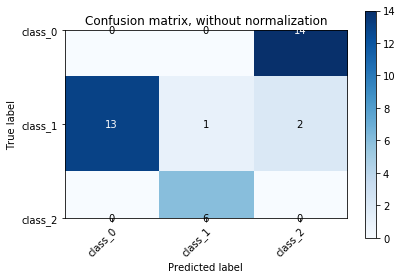

In [45]:
plot_confusion_matrix(y_test, y_pred, classes= wine_bunch.target_names)